In [1]:
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import keras

In [2]:
data_dir=r'/Users/rahul/Downloads/fracture/fracture_dataset'

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/Users/rahul/Downloads/fracture/fracture_dataset')

In [4]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

0


In [5]:
yes = list(data_dir.glob('yes/*'))
no = list(data_dir.glob('no/*'))

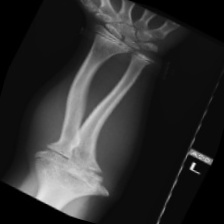

In [6]:
PIL.Image.open(str(no[32]))

In [7]:
Knee_Xray_dict = {
    'Disease': list(data_dir.glob('yes/*')),
    'no': list(data_dir.glob('no/*')),
}

In [8]:
Knee_label_dict = {
    'Disease': 0,
    'no': 1,
}

In [9]:
X, y = [], []

for X_ray, images in Knee_Xray_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(200,200))
        X.append(resized_img)
        y.append(Knee_label_dict[X_ray])

In [10]:
X = np.array(X)
y = np.array(y)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

In [12]:
def normalize_in_batches(data, batch_size):
    num_samples = data.shape[0]
    for start in range(0, num_samples, batch_size):
        end = min(start + batch_size, num_samples)
        data[start:end] = data[start:end] / 255
    return data

X_train = normalize_in_batches(X_train.astype('float32'), batch_size=1000)
X_test = normalize_in_batches(X_test.astype('float32'), batch_size=1000)

In [13]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [14]:
model = keras.Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax'),
])

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [17]:
model.fit(X_train, y_train, epochs=1)

237/237 [==============================] - 105s 444ms/step - loss: 0.0166 - accuracy: 0.9943


In [18]:
model.evaluate(X_test, y_test)

60/60 [==============================] - 8s 131ms/step - loss: 0.0923 - accuracy: 0.9799


[0.09225066751241684, 0.9799260497093201]

(200, 200, 3)
1/1 [==============================] - 0s 20ms/step


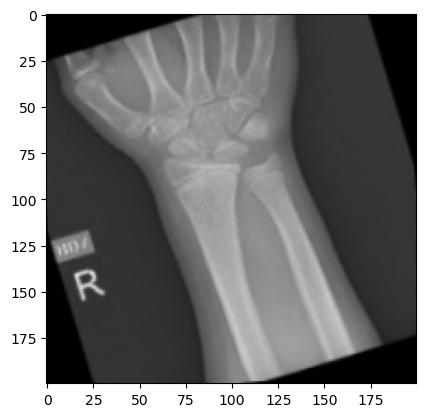

In [26]:
import cv2
import os
import matplotlib.pyplot as plt

file_path = r'/Users/rahul/Downloads/fracture/fracture_dataset/no/1-rotated1-rotated2-rotated2-rotated1.jpg'

if os.path.exists(file_path):
    img = cv2.imread(file_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (200, 200))
        print(img.shape)
        plt.imshow(img,cmap=plt.cm.binary)
    else:
        print("Failed to load image.")
else:
    print("File does not exist at the specified path.")
    
prediction=model.predict(np.array([img])/255)
index=np.argmax(prediction)


In [27]:
indexKnee_label_dict = {
            0: 'fractured',
            1: 'no',
}

In [28]:
predicted_label = indexKnee_label_dict.get(index, "Unknown")
print(predicted_label)

no


In [29]:
import joblib
joblib.dump(model,'/Users/rahul/Downloads/brain_tumor_dataset/handFracture_prediction_model')

['/Users/rahul/Downloads/brain_tumor_dataset/handFracture_prediction_model']